In [40]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt
from polars import selectors as cs

In [5]:
df_anage = pl.read_csv("../data/anage.csv", ignore_errors=True)
df_earthq = (pl.read_csv("../data/EarthquakesChile_2000-2024.csv")
             .with_columns(year = pl.col("Date").str.slice(0,4).cast(pl.Int16)))

In [11]:
df_earthq_count_by_region = (df_earthq
                             .group_by("Region","year")
                             .len()
                             )

df_earthq_count_by_region_pivot = df_earthq_count_by_region.pivot(index = "Region", on="year")
df_earthq_count_by_region_pivot

Region,2002,2023,2021,2009,2020,2024,2006,2010,2013,2017,2015,2014,2022,2019,2007,2012,2018,2003,2001,2016,2005,2011,2008,2004,2000
str,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
"""Antofagasta""",21,2574,2523,1191,2591,470,312,694,1812,2416,1554,1607,2814,2356,937,1369,2240,18,4,1822,411,1343,1671,98,null
"""Atacama""",112,570,603,202,773,91,509,126,251,443,273,215,494,444,218,278,494,125,23,273,175,234,78,110,2
"""Valparaíso""",8,387,399,688,438,63,491,744,413,1449,549,411,494,457,657,462,503,56,6,479,57,585,728,51,null
"""Tarapacá""",null,1162,1122,388,1343,201,4,459,1235,1222,1017,3398,1287,1220,28,972,1132,2,null,1012,112,1065,384,9,null
"""Arica y Parinacota""",null,235,245,20,321,37,null,57,234,293,162,216,229,299,null,187,233,null,null,190,null,152,19,null,null
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Maule""",3,226,205,85,292,39,135,1604,234,223,123,134,239,291,146,384,199,6,1,179,24,420,120,51,null
"""Los Ríos""",2,36,90,7,59,7,2,4,7,30,7,6,38,26,1,5,26,8,2,14,2,60,6,5,null
"""Aysén del General Ibañez del C…",1,29,26,2,40,4,null,11,2,25,1,1,24,25,49,2,31,null,null,16,null,14,2,null,null


<Axes: >

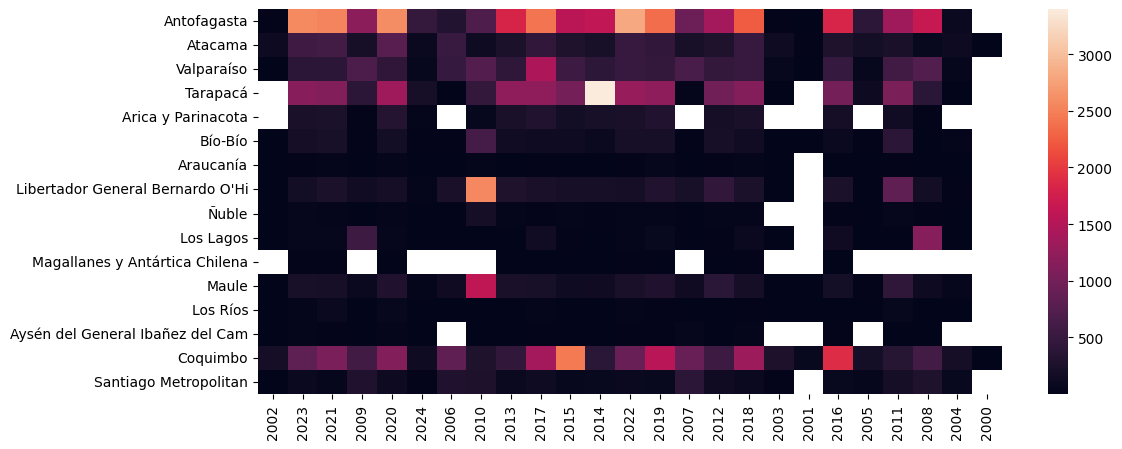

In [18]:
plt.figure(figsize=(12,5))
sns.heatmap(df_earthq_count_by_region_pivot.drop("Region"),
            xticklabels=df_earthq_count_by_region_pivot.drop("Region").columns,
            yticklabels=df_earthq_count_by_region_pivot["Region"].to_list()
            )

<Axes: >

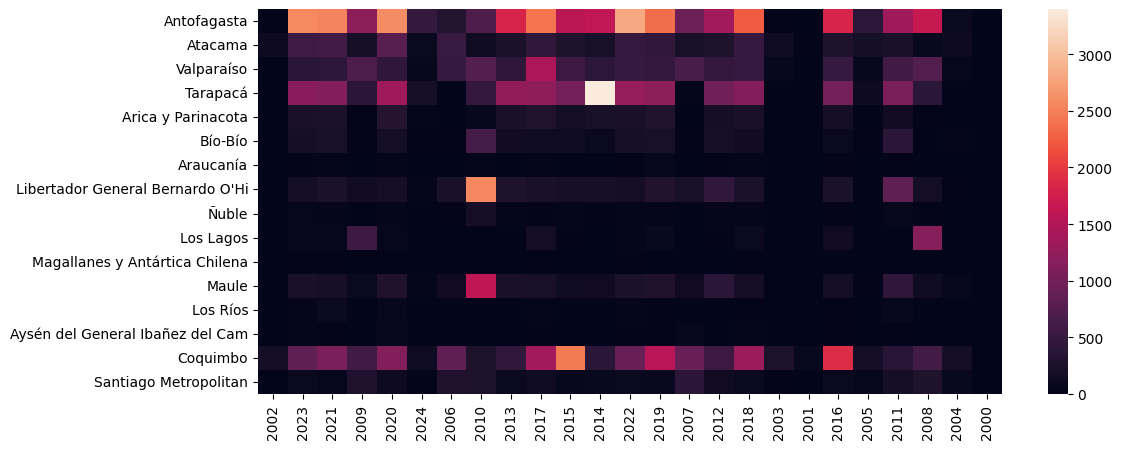

In [21]:
df_earthq_count_by_region_pivot = df_earthq_count_by_region_pivot.fill_null(0)
plt.figure(figsize=(12,5))
sns.heatmap(df_earthq_count_by_region_pivot.drop("Region"),
            xticklabels=df_earthq_count_by_region_pivot.drop("Region").columns,
            yticklabels=df_earthq_count_by_region_pivot["Region"].to_list()
            )

In [35]:
df_earthq_count_by_region_pivot.drop("Region").columns

['2002',
 '2023',
 '2021',
 '2009',
 '2020',
 '2024',
 '2006',
 '2010',
 '2013',
 '2017',
 '2015',
 '2014',
 '2022',
 '2019',
 '2007',
 '2012',
 '2018',
 '2003',
 '2001',
 '2016',
 '2005',
 '2011',
 '2008',
 '2004',
 '2000']

In [38]:
sorted_years = sorted(df_earthq_count_by_region_pivot.drop("Region").columns)

In [43]:
sorted_years

['2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023',
 '2024']

In [42]:
df_earthq_count_by_region_pivot = df_earthq_count_by_region_pivot.select([cs.by_name("Region")] + sorted_years)

In [ ]:
df_earthq_count_by_region_pivot

Region,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
str,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
"""Antofagasta""",0,4,21,18,98,411,312,937,1671,1191,694,1343,1369,1812,1607,1554,1822,2416,2240,2356,2591,2523,2814,2574,470
"""Atacama""",2,23,112,125,110,175,509,218,78,202,126,234,278,251,215,273,273,443,494,444,773,603,494,570,91
"""Valparaíso""",0,6,8,56,51,57,491,657,728,688,744,585,462,413,411,549,479,1449,503,457,438,399,494,387,63
"""Tarapacá""",0,0,0,2,9,112,4,28,384,388,459,1065,972,1235,3398,1017,1012,1222,1132,1220,1343,1122,1287,1162,201
"""Arica y Parinacota""",0,0,0,0,0,0,0,0,19,20,57,152,187,234,216,162,190,293,233,299,321,245,229,235,37
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Maule""",0,1,3,6,51,24,135,146,120,85,1604,420,384,234,134,123,179,223,199,291,292,205,239,226,39
"""Los Ríos""",0,2,2,8,5,2,2,1,6,7,4,60,5,7,6,7,14,30,26,26,59,90,38,36,7
"""Aysén del General Ibañez del C…",0,0,1,0,0,0,0,49,2,2,11,14,2,2,1,1,16,25,31,25,40,26,24,29,4


<Axes: >

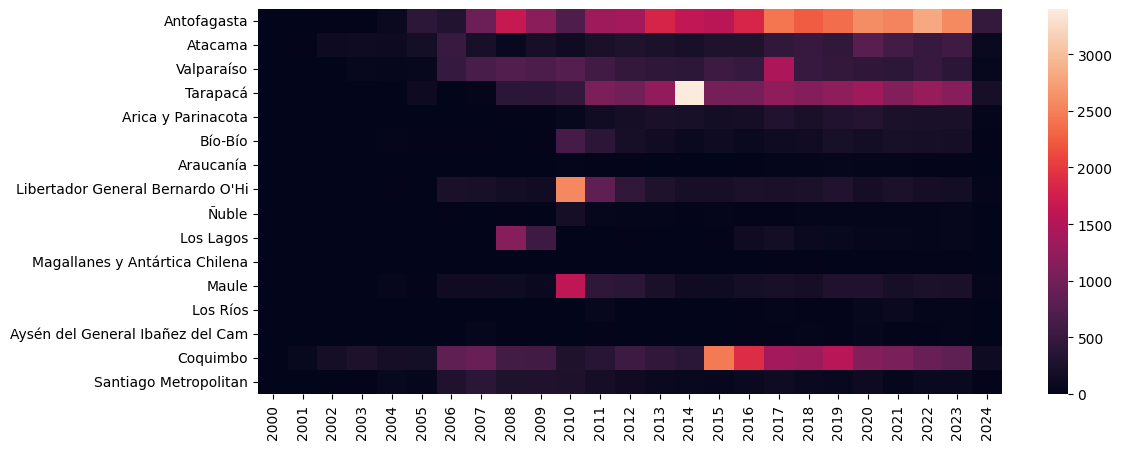

In [45]:
plt.figure(figsize=(12,5))
sns.heatmap(df_earthq_count_by_region_pivot.drop("Region"),
            xticklabels=df_earthq_count_by_region_pivot.drop("Region").columns,
            yticklabels=df_earthq_count_by_region_pivot["Region"].to_list()
            )

In [46]:
df_earthq_count_by_region_pivot

Region,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
str,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32,u32
"""Antofagasta""",0,4,21,18,98,411,312,937,1671,1191,694,1343,1369,1812,1607,1554,1822,2416,2240,2356,2591,2523,2814,2574,470
"""Atacama""",2,23,112,125,110,175,509,218,78,202,126,234,278,251,215,273,273,443,494,444,773,603,494,570,91
"""Valparaíso""",0,6,8,56,51,57,491,657,728,688,744,585,462,413,411,549,479,1449,503,457,438,399,494,387,63
"""Tarapacá""",0,0,0,2,9,112,4,28,384,388,459,1065,972,1235,3398,1017,1012,1222,1132,1220,1343,1122,1287,1162,201
"""Arica y Parinacota""",0,0,0,0,0,0,0,0,19,20,57,152,187,234,216,162,190,293,233,299,321,245,229,235,37
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
"""Maule""",0,1,3,6,51,24,135,146,120,85,1604,420,384,234,134,123,179,223,199,291,292,205,239,226,39
"""Los Ríos""",0,2,2,8,5,2,2,1,6,7,4,60,5,7,6,7,14,30,26,26,59,90,38,36,7
"""Aysén del General Ibañez del C…",0,0,1,0,0,0,0,49,2,2,11,14,2,2,1,1,16,25,31,25,40,26,24,29,4


In [49]:
df_earthq_count_by_region_pivot["Region"].to_list()

['Antofagasta',
 'Atacama',
 'Valparaíso',
 'Tarapacá',
 'Arica y Parinacota',
 'Bío-Bío',
 'Araucanía',
 "Libertador General Bernardo O'Hi",
 'Ñuble',
 'Los Lagos',
 'Magallanes y Antártica Chilena',
 'Maule',
 'Los Ríos',
 'Aysén del General Ibañez del Cam',
 'Coquimbo',
 'Santiago Metropolitan']

In [50]:
sorted_regions = [
'Arica y Parinacota',
'Tarapacá',
'Antofagasta',
'Atacama',
'Coquimbo',
'Valparaíso',
'Santiago Metropolitan',
"Libertador General Bernardo O'Hi",
'Maule',
'Ñuble',
'Bío-Bío',
'Araucanía',
'Los Ríos',
'Los Lagos',
'Aysén del General Ibañez del Cam',
'Magallanes y Antártica Chilena'
]

In [54]:
df_earthq_count_by_region_pivot  = (df_earthq_count_by_region_pivot
                               .with_columns(pl.col("Region").cast(pl.Enum(sorted_regions)))
                               ).sort("Region")

<Axes: >

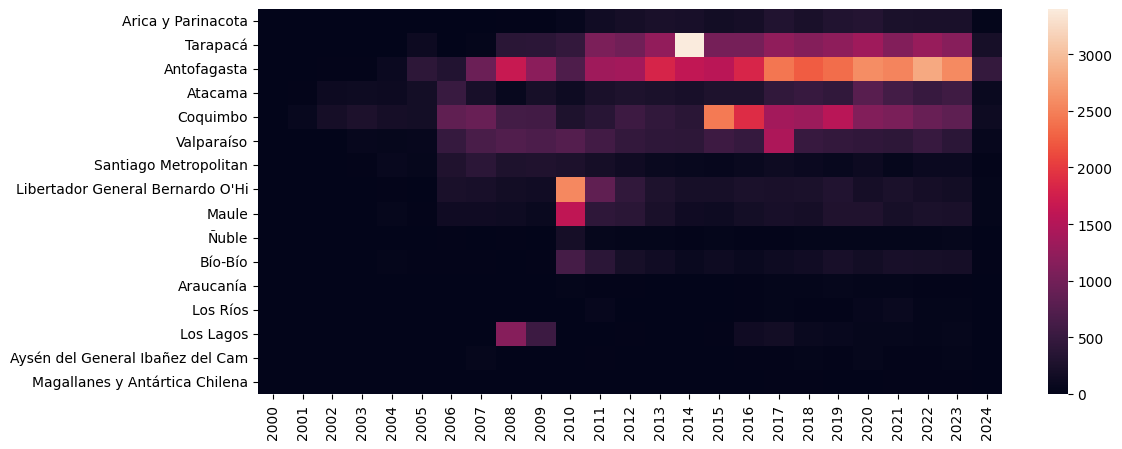

In [56]:
plt.figure(figsize=(12,5))
sns.heatmap(df_earthq_count_by_region_pivot.drop("Region"),
            xticklabels=df_earthq_count_by_region_pivot.drop("Region").columns,
            yticklabels=df_earthq_count_by_region_pivot["Region"].to_list()
            )

<Axes: >

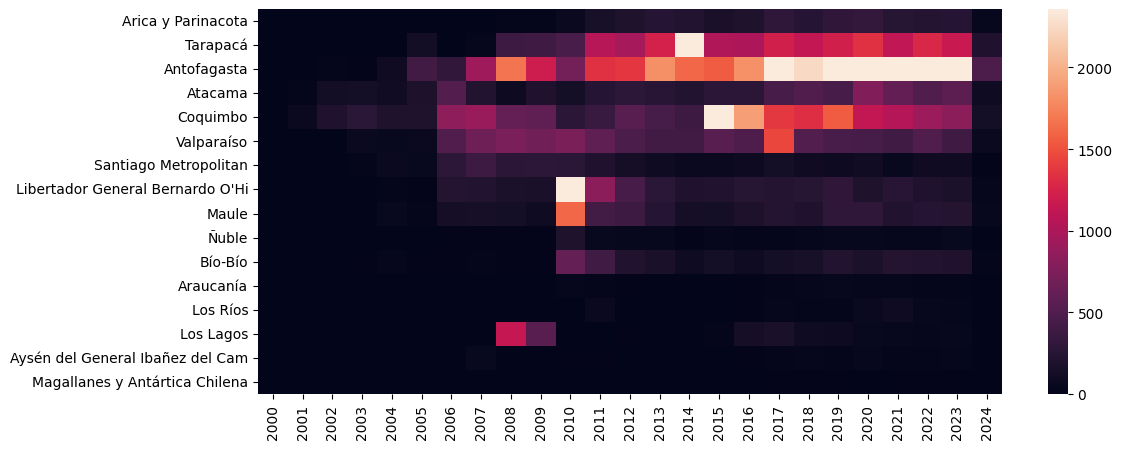

In [57]:
plt.figure(figsize=(12,5))
sns.heatmap(df_earthq_count_by_region_pivot.drop("Region"),
            xticklabels=df_earthq_count_by_region_pivot.drop("Region").columns,
            yticklabels=df_earthq_count_by_region_pivot["Region"].to_list(),
            robust=True
            )

<Axes: >

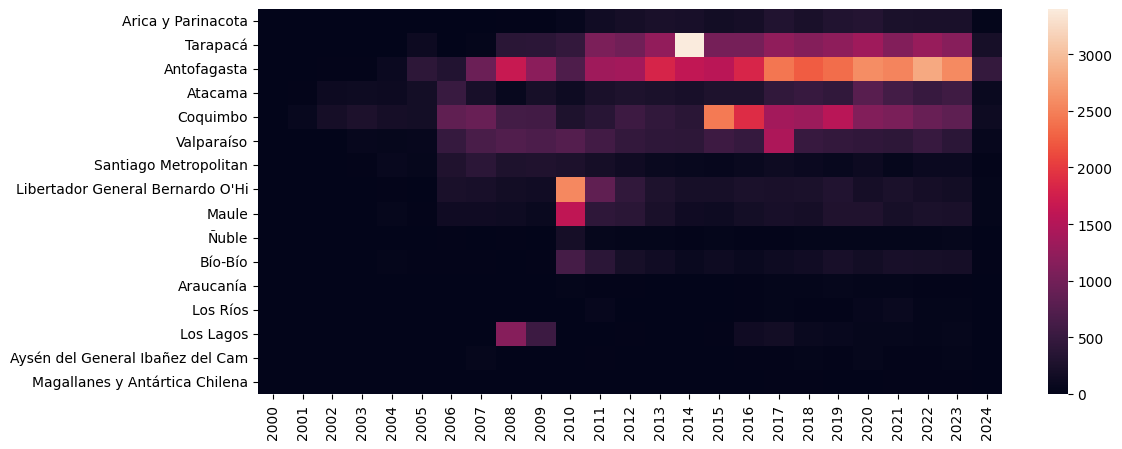

In [68]:
plt.figure(figsize=(12,5))
sns.heatmap(df_earthq_count_by_region_pivot.drop("Region"),
            xticklabels=df_earthq_count_by_region_pivot.drop("Region").columns,
            yticklabels=df_earthq_count_by_region_pivot["Region"].to_list(),
            # vmax=1000,
            # vmin = 200,
            # linecolor="white",
            # linewidths=0.1
            )

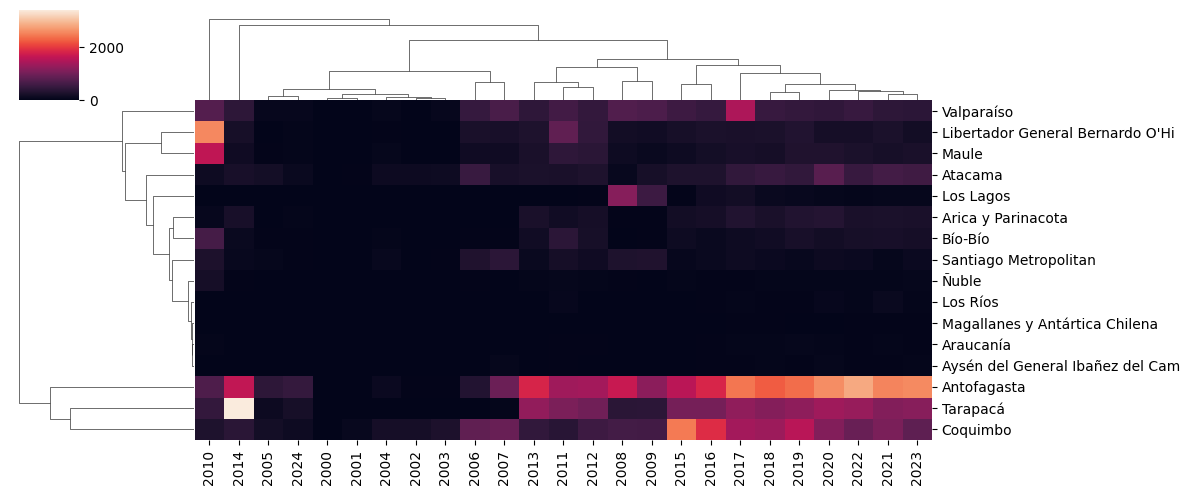

In [73]:
sns.clustermap(df_earthq_count_by_region_pivot.drop("Region"), figsize=(12,5),
                yticklabels=df_earthq_count_by_region_pivot["Region"].to_list(),
                xticklabels=df_earthq_count_by_region_pivot.drop("Region").columns,
               )

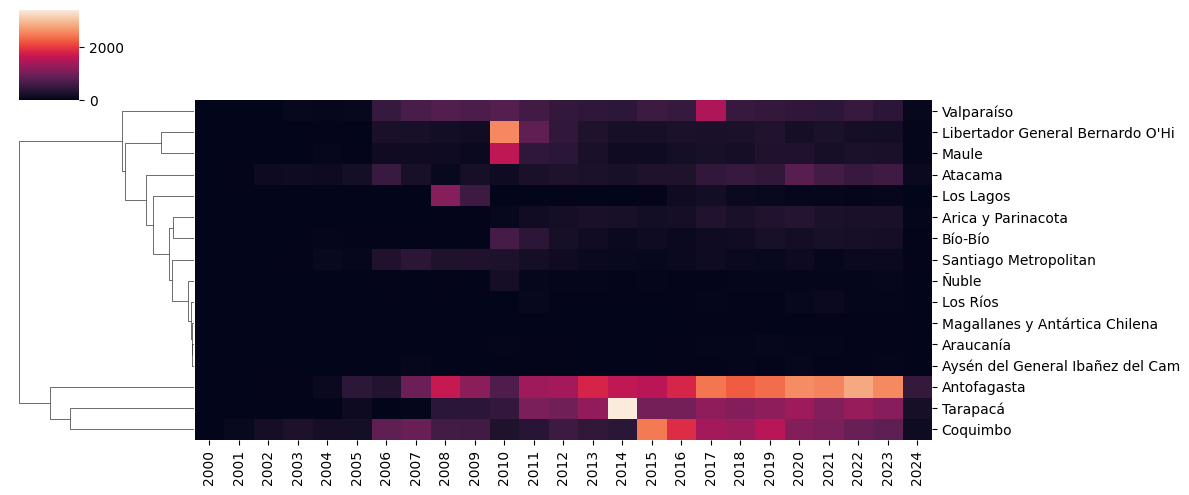

In [74]:
sns.clustermap(df_earthq_count_by_region_pivot.drop("Region"), figsize=(12,5),
                yticklabels=df_earthq_count_by_region_pivot["Region"].to_list(),
                xticklabels=df_earthq_count_by_region_pivot.drop("Region").columns,
                col_cluster=False
               )

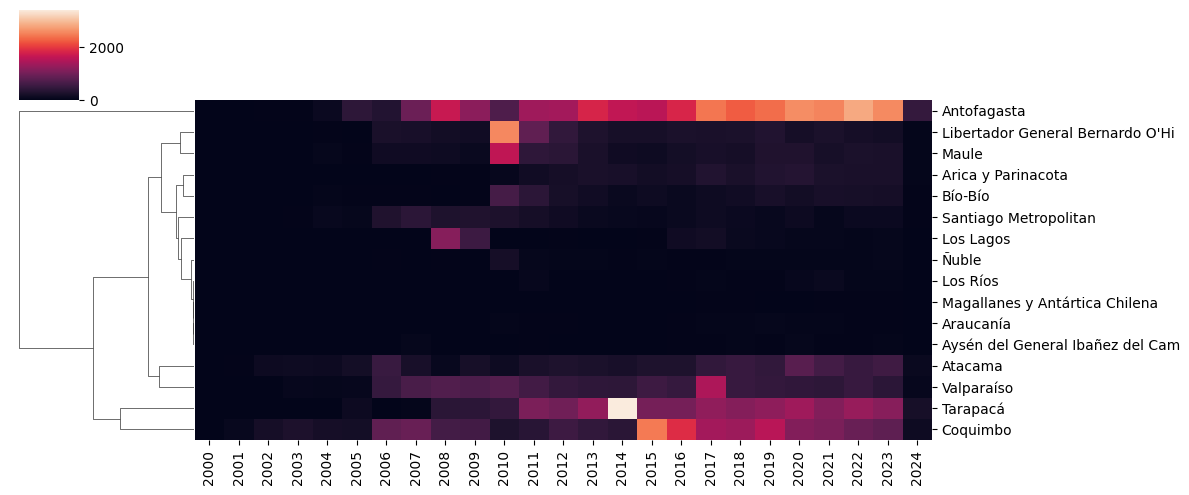

In [75]:
sns.clustermap(df_earthq_count_by_region_pivot.drop("Region"), figsize=(12,5),
                yticklabels=df_earthq_count_by_region_pivot["Region"].to_list(),
                xticklabels=df_earthq_count_by_region_pivot.drop("Region").columns,
                col_cluster=False,
                metric="cityblock"
               )

In [76]:
region_zone = {
'Arica y Parinacota': 'Norte',
'Tarapacá': 'Norte',
'Antofagasta': 'Norte',
'Atacama': 'Norte',
'Coquimbo': 'Centro',
'Valparaíso': 'Centro',
'Santiago Metropolitan': 'Centro',
"Libertador General Bernardo O'Hi": 'Centro',
'Maule': 'Centro',
'Ñuble': 'Centro',
'Bío-Bío': 'Sur',
'Araucanía': 'Sur',
'Los Ríos': 'Sur',
'Los Lagos': 'Sur',
'Aysén del General Ibañez del Cam': 'Sur',
'Magallanes y Antártica Chilena': 'Sur'
}



zone_palette = {
'Norte': 'cadetblue', 
'Centro': 'pink', 
'Sur': 'darkseagreen'

}

In [83]:
df_colors = (pl.DataFrame({"Region":sorted_regions})
             .with_columns(zona = pl.col("Region").replace(region_zone))
             ).with_columns(color = pl.col("zona").replace(zone_palette))

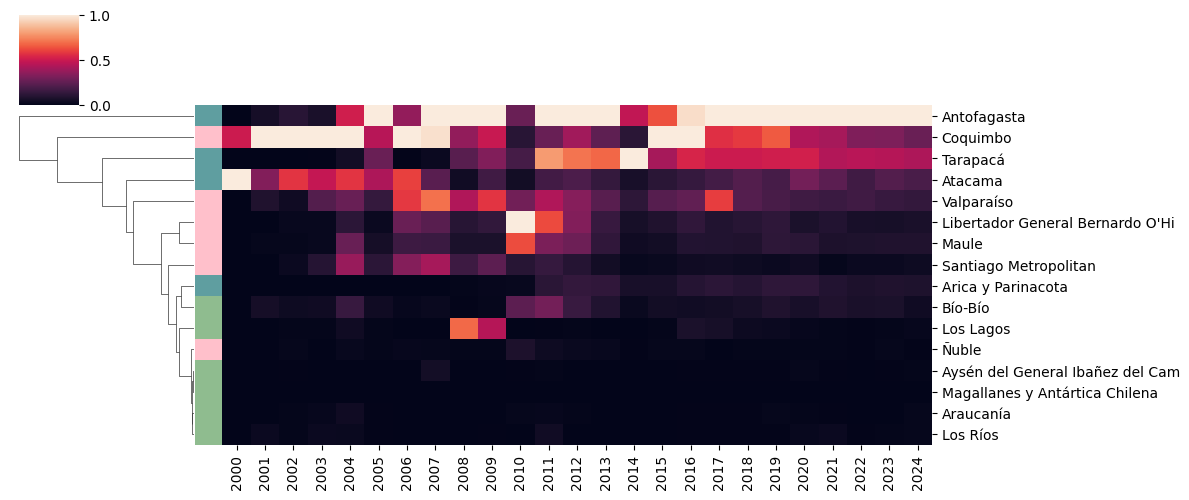

In [88]:
sns.clustermap(df_earthq_count_by_region_pivot.drop("Region"), figsize=(12,5),
                yticklabels=df_earthq_count_by_region_pivot["Region"].to_list(),
                xticklabels=df_earthq_count_by_region_pivot.drop("Region").columns,
                col_cluster=False,
                metric="cityblock",
                row_colors=df_colors["color"],
                standard_scale=True
               )

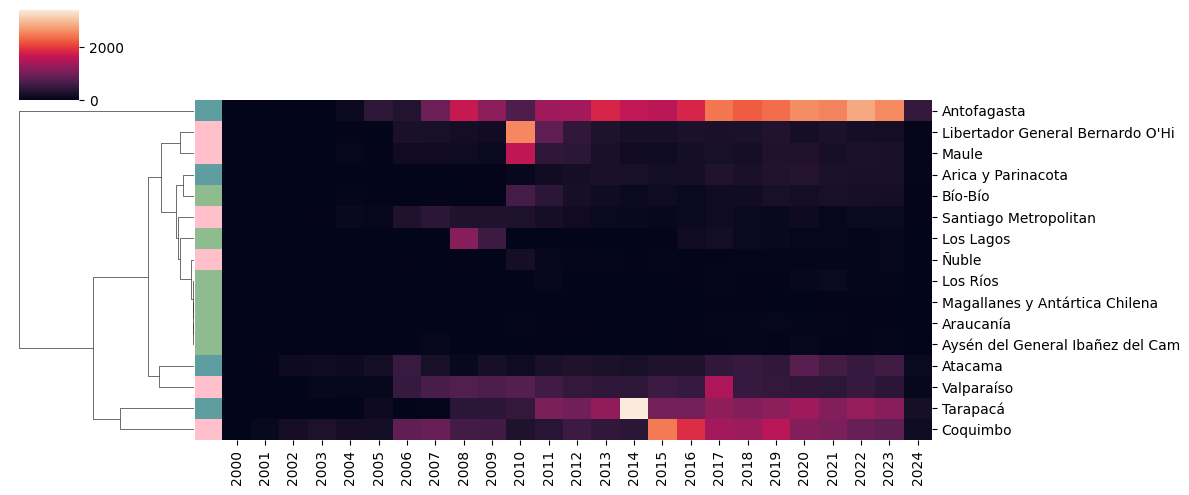

In [89]:
sns.clustermap(df_earthq_count_by_region_pivot.drop("Region"), figsize=(12,5),
                yticklabels=df_earthq_count_by_region_pivot["Region"].to_list(),
                xticklabels=df_earthq_count_by_region_pivot.drop("Region").columns,
                col_cluster=False,
                metric="cityblock",
                row_colors=df_colors["color"],
              
               )

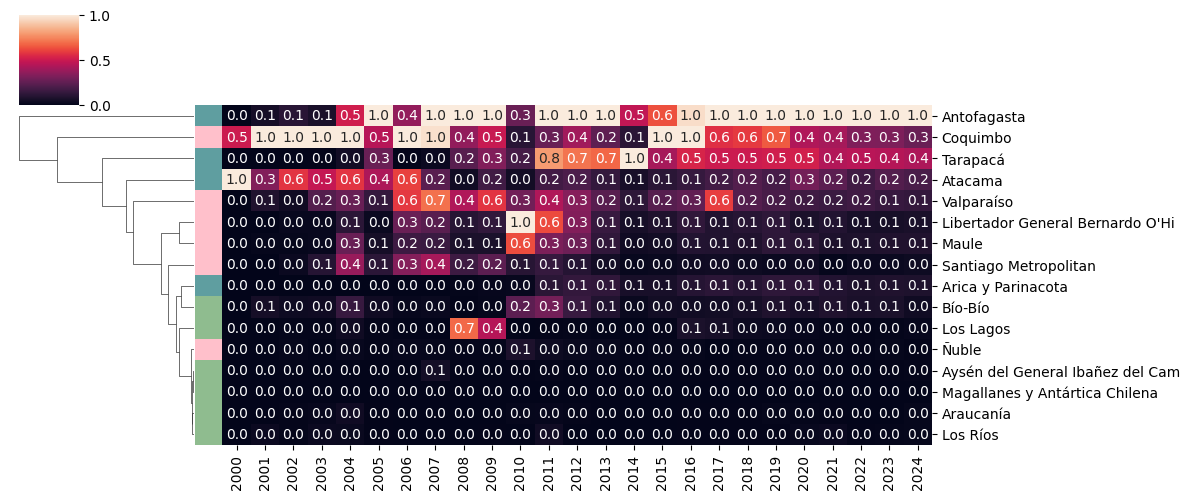

In [95]:
sns.clustermap(df_earthq_count_by_region_pivot.drop("Region"), figsize=(12,5),
                yticklabels=df_earthq_count_by_region_pivot["Region"].to_list(),
                xticklabels=df_earthq_count_by_region_pivot.drop("Region").columns,
                col_cluster=False,
                metric="cityblock",
                row_colors=df_colors["color"],
                standard_scale=True,
                annot=True,
               fmt=".1f"
               )